<a href="https://colab.research.google.com/github/vngeno/FOOTBALL-ANALYSIS/blob/main/FOOTBALL_ANALYSIS_REGRESSION_MODELLING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DEFINING THE QUESTION

##Specifying the Question

We will work as football analysts for a company - Mchezopesa Ltd to predict the result of a game between team 1 and team 2 based on who's home and who's away and on whether or not the game is friendly.

##Understanding the Context

The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium.The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. 

The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches. The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams.

##Recording the Experimental Design

This is the expected flow for the assessment:

Data Cleaning

Perform EDA

Perform any necessary feature engineering

Check for multicollinearity

Start building the model

Cross-validate the model

Compute RMSE

Conclusion

Challenging the Solution

#DATA PREPARATION

##Importing the Libraries

In [1]:
#Import libraries for loading and cleaning data
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix

##Reading the Data

In [2]:
#The rank dataset
df_rank = pd.read_csv('/content/fifa_ranking.csv')
df_rank.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [3]:
#The result dataset
df_result = pd.read_csv('/content/results.csv')
df_result.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


In [4]:
#The fifa ranking dataset has 57793 rows and 16 columns
df_rank.shape

(57793, 16)

In [5]:
#The results dataset has 40839 rows and 9 columns
df_result.shape

(40839, 9)

In [6]:
#We'll now change the date columns in both dataframes to the appropriate data objects to enable us split it into month and year
df_rank['rank_date'] = pd.to_datetime(df_rank['rank_date'])
df_result['date'] = pd.to_datetime(df_result['date'])

In [7]:
#Checking for the appropriate data types
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [8]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


##Data Cleaning

In [9]:
df_rank['year'] = df_rank['rank_date'].dt.year
df_rank['month'] = df_rank['rank_date'].dt.month
print(df_rank)
print('******************************************************************************************')
df_result['year'] = df_result['date'].dt.year
df_result['month'] = df_result['date'].dt.month
print(df_result)

       rank country_full country_abrv  ...  rank_date  year  month
0         1      Germany          GER  ... 1993-08-08  1993      8
1         2        Italy          ITA  ... 1993-08-08  1993      8
2         3  Switzerland          SUI  ... 1993-08-08  1993      8
3         4       Sweden          SWE  ... 1993-08-08  1993      8
4         5    Argentina          ARG  ... 1993-08-08  1993      8
...     ...          ...          ...  ...        ...   ...    ...
57788   206     Anguilla          AIA  ... 2018-06-07  2018      6
57789   206      Bahamas          BAH  ... 2018-06-07  2018      6
57790   206      Eritrea          ERI  ... 2018-06-07  2018      6
57791   206      Somalia          SOM  ... 2018-06-07  2018      6
57792   206        Tonga          TGA  ... 2018-06-07  2018      6

[57793 rows x 18 columns]
******************************************************************************************
            date         home_team        away_team  ...  neutral  year month


In [10]:
#Checking for null values and there's none in the rank dataset
df_rank.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
year                       0
month                      0
dtype: int64

In [11]:
#Checking for duplicated records in the rank dataset. There are 37 but we'll keep them as they may contain important information to be used in the analysis
df_rank.duplicated().sum()

37

In [12]:
#Checking for duplicated records in the result dataset and there's none
df_result.duplicated().sum()

0

In [13]:
#There are no null records in the result dataset 
df_result.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
year          0
month         0
dtype: int64

In [14]:
#Checking the columns in each dataframe
#Ranking 
df_rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'year',
       'month'],
      dtype='object')

In [15]:
#Result
df_result.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month'],
      dtype='object')

In [16]:
#Dropping the Irrelevant columns
#Ranking
df_rank.drop(columns=['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation'],inplace=True)
df_rank.head(2)

,rank,country_full,rank_date,year,month
0,1,Germany,1993-08-08,1993,8
1,2,Italy,1993-08-08,1993,8


In [17]:
#Result
df_result.drop(columns=['city', 'neutral','country'], inplace=True)
df_result.head(2)

,date,home_team,away_team,home_score,away_score,tournament,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,1873,3


In [18]:
#Renaming the columns
#Ranking 
df_rank.rename(columns = {'country_full': 'home_team'}, inplace =True)
df_rank.head(2)

df_rank.rename(columns = {'rank_date': 'date'}, inplace =True)
df_rank.head(2)

,rank,home_team,date,year,month
0,1,Germany,1993-08-08,1993,8
1,2,Italy,1993-08-08,1993,8


In [19]:
#Checking for uniques values in the date column in result dataset. It has values from 1872-2019
df_result['date'].unique()

array(['1872-11-30T00:00:00.000000000', '1873-03-08T00:00:00.000000000',
       '1874-03-07T00:00:00.000000000', ...,
       '2019-07-18T00:00:00.000000000', '2019-07-19T00:00:00.000000000',
       '2019-07-20T00:00:00.000000000'], dtype='datetime64[ns]')

In [20]:
#Checking for unique values in the date column in rank dataset. It ranges from 1993 - 2018
df_rank['date'].unique()

array(['1993-08-08T00:00:00.000000000', '1993-09-23T00:00:00.000000000',
       '1993-10-22T00:00:00.000000000', '1993-11-19T00:00:00.000000000',
       '1993-12-23T00:00:00.000000000', '1994-02-15T00:00:00.000000000',
       '1994-03-15T00:00:00.000000000', '1994-04-19T00:00:00.000000000',
       '1994-05-17T00:00:00.000000000', '1994-06-14T00:00:00.000000000',
       '1994-07-21T00:00:00.000000000', '1994-09-13T00:00:00.000000000',
       '1994-10-25T00:00:00.000000000', '1994-11-22T00:00:00.000000000',
       '1994-12-20T00:00:00.000000000', '1995-02-20T00:00:00.000000000',
       '1995-04-19T00:00:00.000000000', '1995-05-16T00:00:00.000000000',
       '1995-06-13T00:00:00.000000000', '1995-07-25T00:00:00.000000000',
       '1995-08-22T00:00:00.000000000', '1995-09-19T00:00:00.000000000',
       '1995-10-17T00:00:00.000000000', '1995-11-21T00:00:00.000000000',
       '1995-12-19T00:00:00.000000000', '1996-01-24T00:00:00.000000000',
       '1996-02-21T00:00:00.000000000', '1996-04-24

In [21]:
#We will now filter the result dataset, date column so it can have same range of date values with the rank dataset
df2_result = df_result[(df_result["date"] > '1993-01-01') &  (df_result["date"] < '2018-06-07')]
df2_result.head()

,date,home_team,away_team,home_score,away_score,tournament,year,month
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,1993,1
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,1993,1
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,1993,1
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,1993,1
17366,1993-01-08,Uganda,Tanzania,3,1,Friendly,1993,1


In [22]:
#We will now merge the dataframes using inner in order to use the columns that are similar

df_home = pd.merge(df_rank, df2_result, how='inner', on=['home_team','year','month','date'])
df_home.head()

,rank,home_team,date,year,month,away_team,home_score,away_score,tournament
0,8,Brazil,1993-08-08,1993,8,Mexico,1,1,Friendly
1,35,Ecuador,1993-08-08,1993,8,Venezuela,5,0,FIFA World Cup qualification
2,50,Zimbabwe,1993-08-08,1993,8,Eswatini,2,0,Friendly
3,59,Bolivia,1993-08-08,1993,8,Uruguay,3,1,FIFA World Cup qualification
4,65,Guinea,1993-08-08,1993,8,Sierra Leone,1,0,Friendly


In [23]:
#Renaming the rank column to home rank since it's the home team rank
df_home.rename(columns = {'rank': 'home_rank'}, inplace =True)
df_home.head()

,home_rank,home_team,date,year,month,away_team,home_score,away_score,tournament
0,8,Brazil,1993-08-08,1993,8,Mexico,1,1,Friendly
1,35,Ecuador,1993-08-08,1993,8,Venezuela,5,0,FIFA World Cup qualification
2,50,Zimbabwe,1993-08-08,1993,8,Eswatini,2,0,Friendly
3,59,Bolivia,1993-08-08,1993,8,Uruguay,3,1,FIFA World Cup qualification
4,65,Guinea,1993-08-08,1993,8,Sierra Leone,1,0,Friendly


In [24]:
#We have no null values so far
df_home.isnull().sum()

home_rank     0
home_team     0
date          0
year          0
month         0
away_team     0
home_score    0
away_score    0
tournament    0
dtype: int64

In [25]:
df_rank.columns

Index(['rank', 'home_team', 'date', 'year', 'month'], dtype='object')

In [26]:
df2_result.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'year', 'month'],
      dtype='object')

In [27]:
#We'll now merge to create away team rank since it's necessary for our analysis
#Here, we're renaming the home team to away team because matches are played both at home and away 
df_rank.rename(columns={'home_team':'away_team'}, inplace=True)
df_rank.head()

,rank,away_team,date,year,month
0,1,Germany,1993-08-08,1993,8
1,2,Italy,1993-08-08,1993,8
2,3,Switzerland,1993-08-08,1993,8
3,4,Sweden,1993-08-08,1993,8
4,5,Argentina,1993-08-08,1993,8


In [28]:
#Merging the away dataset on inner based on similar columns
df_away = pd.merge(df_rank, df2_result, how='inner', on=['away_team','year','month','date'])
df_away.head()

,rank,away_team,date,year,month,home_team,home_score,away_score,tournament
0,5,Argentina,1993-08-08,1993,8,Paraguay,1,3,FIFA World Cup qualification
1,14,Mexico,1993-08-08,1993,8,Brazil,1,1,Friendly
2,19,Colombia,1993-08-08,1993,8,Peru,0,1,FIFA World Cup qualification
3,22,Uruguay,1993-08-08,1993,8,Bolivia,3,1,FIFA World Cup qualification
4,86,Sierra Leone,1993-08-08,1993,8,Guinea,1,0,Friendly


In [29]:
#Renaming the rank column to away_rank
df_away.rename(columns={'rank':'away_rank'}, inplace=True)
df_away.head()

,away_rank,away_team,date,year,month,home_team,home_score,away_score,tournament
0,5,Argentina,1993-08-08,1993,8,Paraguay,1,3,FIFA World Cup qualification
1,14,Mexico,1993-08-08,1993,8,Brazil,1,1,Friendly
2,19,Colombia,1993-08-08,1993,8,Peru,0,1,FIFA World Cup qualification
3,22,Uruguay,1993-08-08,1993,8,Bolivia,3,1,FIFA World Cup qualification
4,86,Sierra Leone,1993-08-08,1993,8,Guinea,1,0,Friendly


In [30]:
#There are no nulls in the away dataframe
df_away.isnull().sum()

away_rank     0
away_team     0
date          0
year          0
month         0
home_team     0
home_score    0
away_score    0
tournament    0
dtype: int64

In [31]:
#Merging to get the final dataset for analysis
df_final = pd.merge(df_home, df_away, how='inner', on=['date','year','month'	,'home_score','away_score','tournament'])
df_final.head()

,home_rank,home_team_x,date,year,month,away_team_x,home_score,away_score,tournament,away_rank,away_team_y,home_team_y
0,8,Brazil,1993-08-08,1993,8,Mexico,1,1,Friendly,14,Mexico,Brazil
1,35,Ecuador,1993-08-08,1993,8,Venezuela,5,0,FIFA World Cup qualification,94,Venezuela,Ecuador
2,59,Bolivia,1993-08-08,1993,8,Uruguay,3,1,FIFA World Cup qualification,22,Uruguay,Bolivia
3,65,Guinea,1993-08-08,1993,8,Sierra Leone,1,0,Friendly,86,Sierra Leone,Guinea
4,67,Paraguay,1993-08-08,1993,8,Argentina,1,3,FIFA World Cup qualification,5,Argentina,Paraguay


In [32]:
#Dropping the duplicate columns
df_final.drop(columns= ['home_team_y','away_team_y',], inplace=True)
df_final.head(2)

,home_rank,home_team_x,date,year,month,away_team_x,home_score,away_score,tournament,away_rank
0,8,Brazil,1993-08-08,1993,8,Mexico,1,1,Friendly,14
1,35,Ecuador,1993-08-08,1993,8,Venezuela,5,0,FIFA World Cup qualification,94


In [33]:
#Renaming our columns
df_final.rename(columns={'home_team_x':'home_team','away_team_x':'away_team'}, inplace=True)
df_final.head()

,home_rank,home_team,date,year,month,away_team,home_score,away_score,tournament,away_rank
0,8,Brazil,1993-08-08,1993,8,Mexico,1,1,Friendly,14
1,35,Ecuador,1993-08-08,1993,8,Venezuela,5,0,FIFA World Cup qualification,94
2,59,Bolivia,1993-08-08,1993,8,Uruguay,3,1,FIFA World Cup qualification,22
3,65,Guinea,1993-08-08,1993,8,Sierra Leone,1,0,Friendly,86
4,67,Paraguay,1993-08-08,1993,8,Argentina,1,3,FIFA World Cup qualification,5


In [34]:
#So far, we have no null values
df_final.isnull().sum()

home_rank     0
home_team     0
date          0
year          0
month         0
away_team     0
home_score    0
away_score    0
tournament    0
away_rank     0
dtype: int64

In [35]:
df_final.shape

(1862, 10)

#EXPLORATORY DATA ANALYSIS

##Univariate Analysis

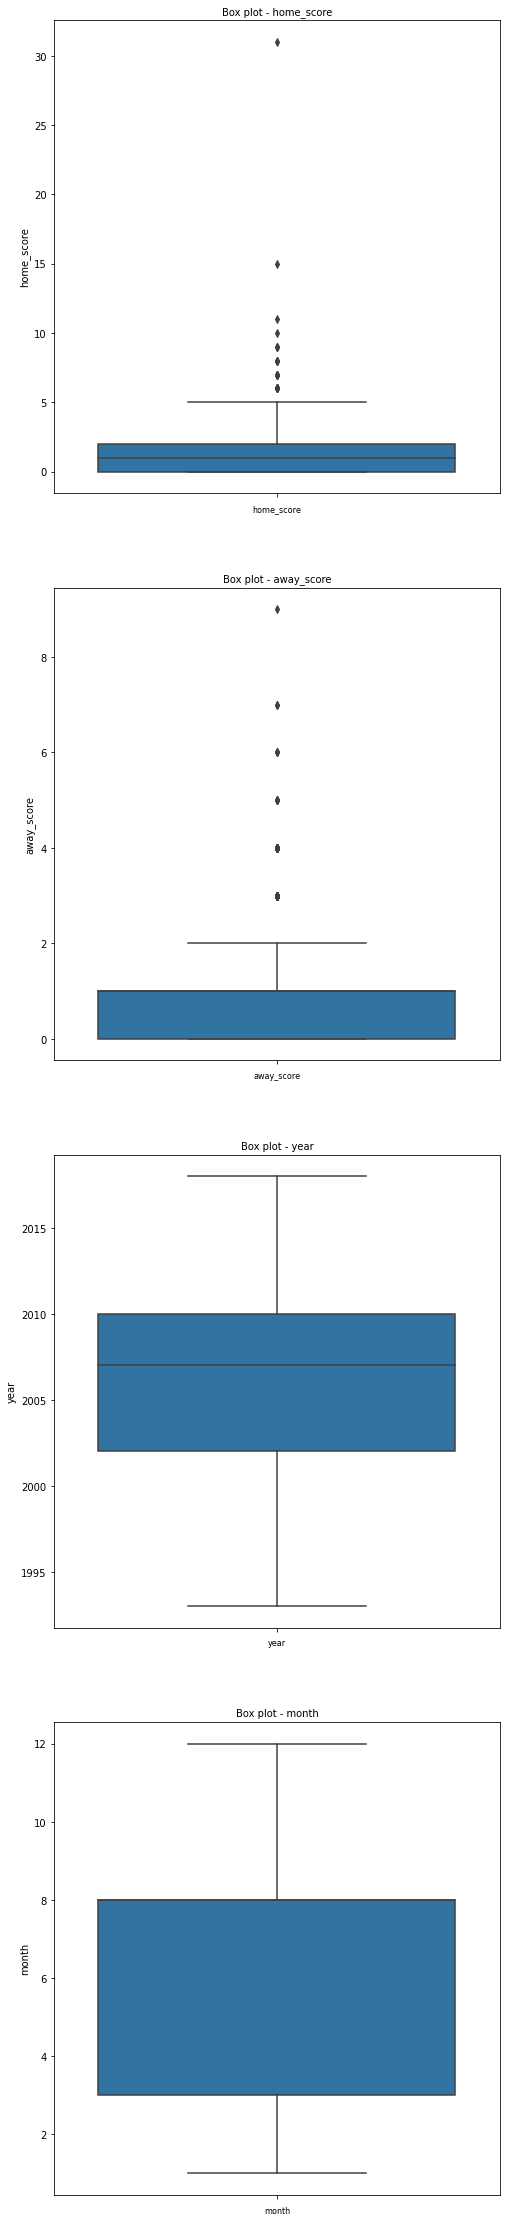

In [36]:
#checking for outliers
col_names = ['home_score','away_score','year'	,'month']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=df_final[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

There are outliers in the home score and away score columns but we will keep them as they are a crucial part of our analysis. The outliers could be from matches where scores went as far as 12-2 which happens in football

In [37]:
#The summary statistics are as follows
df_final.describe()

,home_rank,year,month,home_score,away_score,away_rank
count,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000
mean,61.635875,2005.650376,6.649839,1.335124,0.851235,63.639635
std,44.824951,4.867033,3.246765,1.484088,0.967997,47.410456
min,1.000000,1993.000000,1.000000,0.000000,0.000000,1.000000
25%,25.000000,2002.000000,3.000000,0.000000,0.000000,25.000000
50%,53.000000,2007.000000,8.000000,1.000000,1.000000,54.500000
75%,86.000000,2010.000000,8.000000,2.000000,1.000000,94.000000
max,206.000000,2018.000000,12.000000,31.000000,9.000000,209.000000


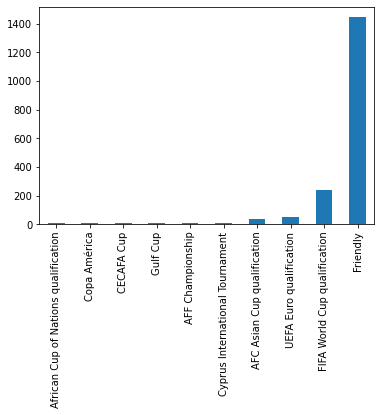

In [38]:
df_final['tournament'].value_counts().head(10).sort_values().plot.bar()
plt.show()

From the above, the most popular matches are the friendlies followed by WorldCup qualifications and Euro qualification.

##Bivariate Analysis

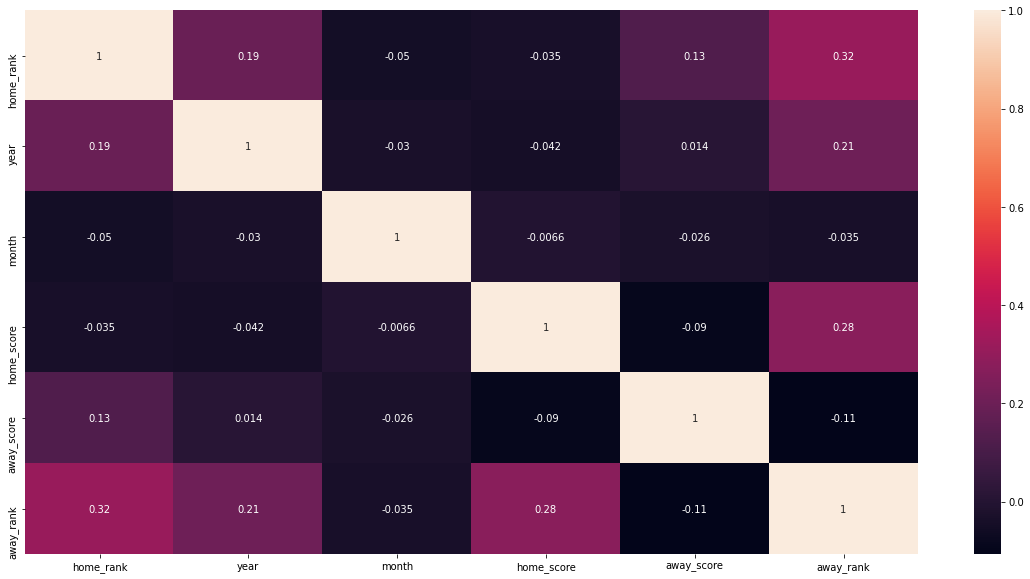

In [39]:
#Pearson's heatmap to check correlation between the variables
corr = df_final.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

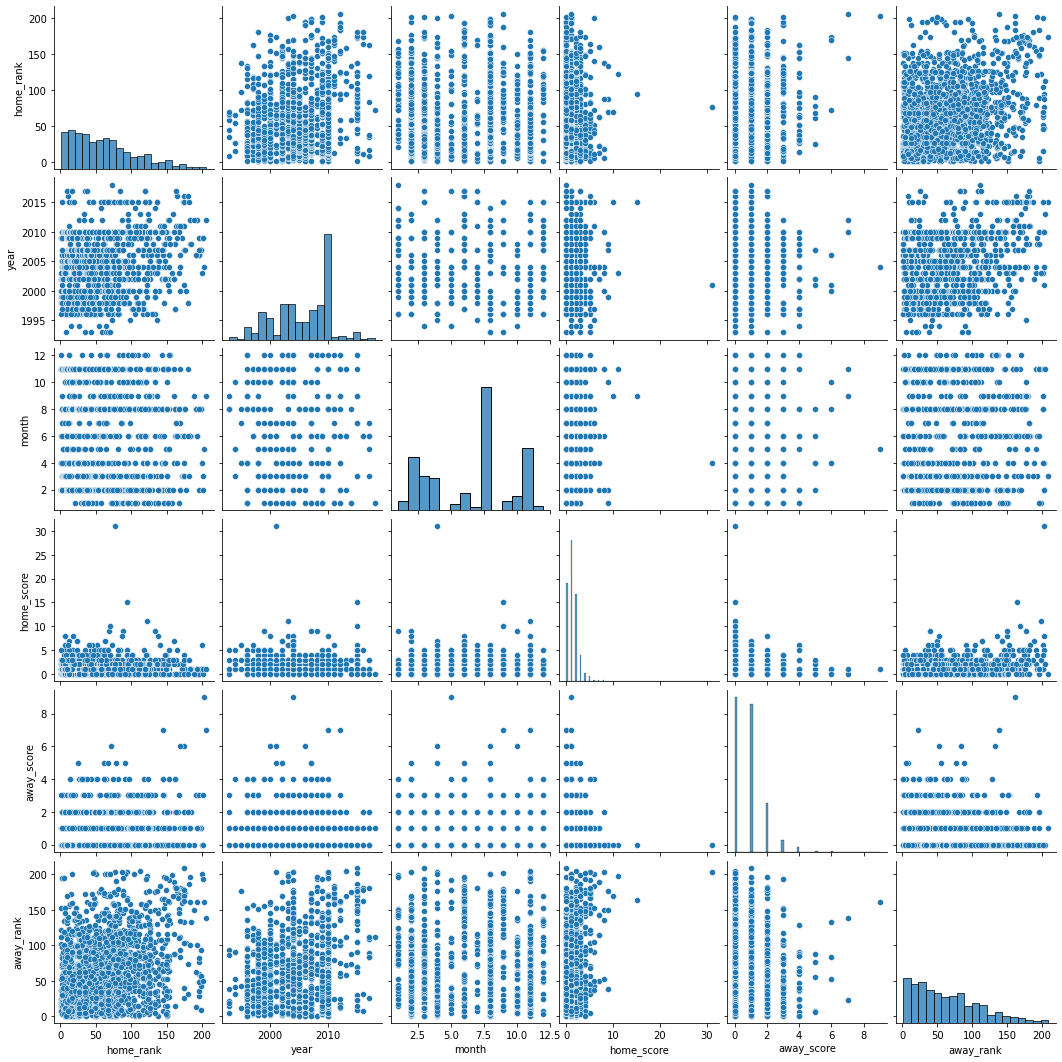

In [40]:
sns.pairplot(df_final)
plt.show()

#MODELING

##Polynomial Regression

Our first model will predict how many goals the home team scores

Our dependent variable will be home scores which will be the y variable and our independent variable will be the home rank, away rank and year

In [41]:
#importing the necessary libraries for our model
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [42]:
home_goals = df_final[['away_rank','home_rank','year']]
home_goals

,away_rank,home_rank,year
0,14,8,1993
1,94,35,1993
2,22,59,1993
3,86,65,1993
4,5,67,1993
...,...,...,...
1857,109,120,2017
1858,26,17,2017
1859,112,38,2017
1860,181,163,2017


In [81]:
#Checking for multicollinearity in the independent variables that could influence the number of home goals
#There's a positive correlation between the three variables and that means they could influence the scoring of a goal by the home team.
home_goals.corr()

,away_rank,home_rank,year
away_rank,1.000000,0.315018,0.207375
home_rank,0.315018,1.000000,0.193109
year,0.207375,0.193109,1.000000


In [44]:
#Defining the independent and dependent variables
X = home_goals.values
y = df_final.iloc[:,6].values
print(X)


[[  14    8 1993]
 [  94   35 1993]
 [  22   59 1993]
 ...
 [ 112   38 2017]
 [ 181  163 2017]
 [ 111   73 2018]]


In [45]:
#Splitting the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


In [46]:
#Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

In [47]:
#Fitting the ploynomial regresion to the dataset
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#With 2 degrees of freedom
poly_reg = PolynomialFeatures(degree = 2) 
X_poly= poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
#Predicting the home score
y_pred= pol_reg.predict(X_poly)
y_pred

array([1.17071547, 2.52546103, 0.98431554, ..., 0.92888061, 1.66348505,
       0.914914  ])

In [50]:
#Finding RMSE AND R2 to see if the model fits
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(rmse)
print(r2)

1.3727070682547857
0.14400761142748653


From the above our R2(coefficient of determination is scaled between 0 and 1) is 11% of the variance. Hence this is not a good fit. A good model should be in the range of 0.7-1 where 1 is a perfect fit.

In [51]:
#We'll now check with 3 degrees of freedom
poly_reg_3 = PolynomialFeatures(degree = 3) 
X_poly_3 = poly_reg_3.fit_transform(X)

pol_reg_3 = LinearRegression()
pol_reg_3.fit(X_poly_3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred_3 = pol_reg_3.predict(X_poly_3)
y_pred_3

array([0.86651125, 2.43883327, 0.4544883 , ..., 1.91487473, 1.81270447,
       2.00933186])

In [53]:
rmse = np.sqrt(mean_squared_error(y, y_pred_3))
r2 = r2_score(y, y_pred_3)
print(rmse)
print(r2)

1.3321743922170823
0.1938120074627987


In [54]:
#We'll now check with 4 degrees of freedom
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly_4 = poly_reg_4.fit_transform(X)

pol_reg_4 = LinearRegression()
pol_reg_4.fit(X_poly_4, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_pred_4 = pol_reg_4.predict(X_poly_4)
y_pred_4

array([0.95895433, 1.70678126, 1.03079304, ..., 2.19945635, 1.91606348,
       2.09237009])

In [56]:
rmse = np.sqrt(mean_squared_error(y, y_pred_4))
r2 = r2_score(y, y_pred_4)
print(rmse)
print(r2)

1.2982263438378099
0.23437695259792557


With three degrees of freedom, the model still isn't a good fit to predict the home score against home rank and away rank as the R2 is only 23% of the variance

##Cross Validating the Model

In [57]:
folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  #setting up the train and test based on the split determined by KFold
  #With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  #fitting a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  #assessing the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1


we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.3546078748843693

Training model 2
Model 2 Root Mean Squared Error: 2.0801760136007372

Training model 3
Model 3 Root Mean Squared Error: 1.184871254698326

Training model 4
Model 4 Root Mean Squared Error: 1.0275092113853865

Training model 5
Model 5 Root Mean Squared Error: 1.3459928558564775


In [58]:
np.mean(RMSES)

1.3986314420850594

The average RMSE is close to our training model 1 and 5 which is also close to our polynomial model with 3 degrees freedom. Hence it will be most appropriate to pick our polynomial regression model with 3 degrees of freedom.

##Logistic Regression

Here we'll figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [59]:
df_final = df_final.copy()

In [60]:
df_final['match_result'] = df_final['home_score'] - df_final['away_score']

In [61]:
g = df_final['home_score'] - df_final['away_score']

def game_result(g):
  if g > 0:
    return 'WIN'
  elif g < 0:
    return 'LOSS'
  else:
    return 'DRAW'

In [62]:
#We'll create a new column for game result
df_final['match_result']= df_final['match_result'].apply(lambda g: game_result(g))
df_final.head()

,home_rank,home_team,date,year,month,away_team,home_score,away_score,tournament,away_rank,match_result
0,8,Brazil,1993-08-08,1993,8,Mexico,1,1,Friendly,14,DRAW
1,35,Ecuador,1993-08-08,1993,8,Venezuela,5,0,FIFA World Cup qualification,94,WIN
2,59,Bolivia,1993-08-08,1993,8,Uruguay,3,1,FIFA World Cup qualification,22,WIN
3,65,Guinea,1993-08-08,1993,8,Sierra Leone,1,0,Friendly,86,WIN
4,67,Paraguay,1993-08-08,1993,8,Argentina,1,3,FIFA World Cup qualification,5,LOSS


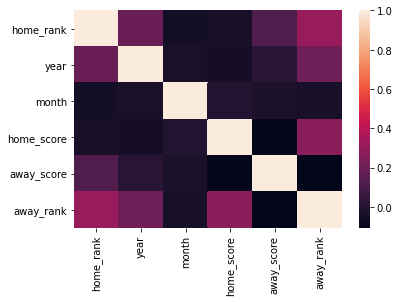

In [63]:
#Checking for independence between features

sns.heatmap(df_final.corr())  

In [64]:
#label encoding the tournament column to convert values to numericals for machine learning
df_final = df_final.copy()

df_final['match_result'] = df_final['match_result'].astype('category')

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_final['match_result'] = labelencoder.fit_transform(df_final['match_result'])
df_final.head()

,home_rank,home_team,date,year,month,away_team,home_score,away_score,tournament,away_rank,match_result
0,8,Brazil,1993-08-08,1993,8,Mexico,1,1,Friendly,14,0
1,35,Ecuador,1993-08-08,1993,8,Venezuela,5,0,FIFA World Cup qualification,94,2
2,59,Bolivia,1993-08-08,1993,8,Uruguay,3,1,FIFA World Cup qualification,22,2
3,65,Guinea,1993-08-08,1993,8,Sierra Leone,1,0,Friendly,86,2
4,67,Paraguay,1993-08-08,1993,8,Argentina,1,3,FIFA World Cup qualification,5,1


In [65]:
#Splitting our dataset to dependent and independent variables
X = df_final[['home_score','away_score']]
y= df_final['match_result']

In [66]:
#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [67]:
#Fitting our model

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
#Using our model to make a prediction
y_pred = LogReg.predict(X_test)

In [69]:
#Accuracy of the model

from sklearn.metrics import accuracy_score
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')

The accuracy of the model is 1.0


In [70]:
#Evaluating the model

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[128,   0,   0],
       [  0,  79,   0],
       [  0,   0, 166]])

The above logistic model is 100% accurate.
There are 128 , 79 and 166 correct predictions.

##Hyperparameter Tuning

In [71]:
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

In [72]:
#We'll use the same dependent and independent variables we used for the logistic regression
X = df_final[['home_score','away_score']]
y= df_final['match_result']

In [73]:
#Creating the logistic regression
logistic = linear_model.LogisticRegression()

In [74]:
#Creating regularization penalty space
penalty = ['l1', 'l2']

In [75]:
#Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

In [76]:
#Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [77]:
#Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [78]:
#Fitting grid search
best_model = clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

In [79]:
#Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [80]:
#Predicting target vector
best_model.predict(X)

array([0, 2, 2, ..., 2, 1, 1])

The above model is 100% accurate since best C is 1.0

#CONCLUSION

The polynomial model wasn't successful because it yielded 13% accurate results while the logistic model was a good fit as it yielded 100% accurate results.

There were a few errors in fitting the variables in the polynomial model and the errors need to be investigated further.

#CHALLENGING THE SOLUTION

The data we worked with had a few challenges especially in merging. A lot of data was lost by the time the final merging was done which could negatively influence the accuracy of the model

There were few errors experienced while fitting the polynomial model hence it wasn't possible to plot the scatter plot which could help us visualize the data and hence make substantial conclusions

